In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

from wordcloud import WordCloud
from tensorflow.python.ops.numpy_ops import np_config
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, Input, Dropout, LayerNormalization

np_config.enable_numpy_behavior()

In [ ]:
data_frame = pd.read_csv("vashantor_5k.csv", header=None)

bangla_sen = pd.DataFrame(data_frame[1])
banglish_sen = pd.DataFrame(data_frame[0])

In [ ]:
banglish_sen.head()

,0
0,Banglish
1,kemon acho?
2,ajke amr mon valo nei
3,tumi ki koro?
4,ei gorome amar kichu valo lage na


In [ ]:
bangla_sen.head()

,1
0,Bangla
1,কেমন আছো ?
2,আজকে আমার মন ভালো নেই
3,তুমি কি করো ?
4,এই গরমে আমার কিছু ভালো লাগে না


In [ ]:
banglish_sen.sample(10)

,0
2685,vocal puropuri remove hoy naki thkei jay
5721,Abar ki File Download korte hobe vai?
4444,apnar mulloban comment er jonno thanks. erokom...
3885,Good post. Expired date kobe?
1557,tumi amake dosh diccho keno?
2671,vpn er kono problam nai but problam holo apnar
603,amar priyo lekhok humayun ahmed
2180,amar dadar barir pichone ekti peyara gach ache
7057,Accha din to
1125,ami ar amar boyfriend eki school e portam


In [ ]:
bangla_sen.sample(10)

,1
308,জীবন থেকে রঙ হারায় গেছে
4286,আমার কাছে ও আছে
2552,"ইউটিউব থেকে কপি করে পোষ্ট করেন ভালো কথা, বাট ক..."
6061,অলরেডি প্রো ইউজ করি
1762,রেগে গেলেন তো হেরে গেলেন
979,সে রেগে গেছিলো
3825,কাজ করে না ভাই এসব ফেইক। রুট ছাড়া সোয়াপ ইম্পসি...
357,সিনেমায় বিয়ের পর গল্প শেষ হয়ে যায় আর বাস্তব জ...
6300,আমি অনেক দিন থেকে ইউজ করি
4139,রেফার করলে কত টাকা দেয়?


In [ ]:
data_frame.sample(10)

,0,1
4750,Eta oshadharon phn vaii ei price a,এটা অসাধারণ ফোন ভাইয়া এই প্রাইস এ
4246,akhane abaler ki pailen…na bujiye bolle author...,এখানে আবালের কি পাইলেন…না বুঝিয়ে বললে অথর আইডি...
946,ami take dekhte pelam,আমি তাকে দখতে পেলাম
1007,se tader sathe somporko rakhbe na,সে তাদের সাথে সম্পর্ক রাখবো না
6545,apni cayle eta niye aro post korte paren,আপনি চায়লে এটা নিয়ে আরো পোস্ট করতে পারেন
3503,ki problem face korechen?,কী প্রব্লেম ফেস করেছেন?
3230,non smoker der sonngkha khub e kom,নন স্মোকার দের সংখ্যা খুব ই কম
5880,Ai Nin Direct Download link google drive,এই নিন ডিরেক্ট ডাউনলোড লিংক গুগল ড্রাইভ
7481,Hashte thakun,হাসতে থাকুন
3009,2 tar kaj to alada typer,২ টার কাজ তো আলাদা টাইপের


In [ ]:
banglish_sen[0].values[1:]

array(['kemon acho?', 'ajke amr mon valo nei', 'tumi ki koro?', ...,
       'Opekkha koren', 'Shomoy ashbe', 'Amadero somoy ashbe'],
      dtype=object)

In [ ]:
bangla_sen[1].values[1:]

array(['কেমন আছো ?', 'আজকে আমার মন ভালো নেই', 'তুমি কি করো ?', ...,
       'অপেক্ষা করেন ', 'সময় আসবে', 'আমাদেরও সময় আসবে'], dtype=object)

In [ ]:
eng_sen =  bangla_sen[1].values[1:]
bang_sen = banglish_sen[0].values[1:]

In [ ]:
for i in range(len(eng_sen)):
    eng_sen[i] = "sos " + str(eng_sen[i]) + " eos."
    bang_sen[i] = "sos " + str(bang_sen[i]) + " eos."

In [ ]:
num_words = 10000
tokenizer_eng = Tokenizer(num_words=num_words, filters='!#$%&()*+,-/:;<=>@«»""[\\]^_`{|}~\t\n')
tokenizer_eng.fit_on_texts(eng_sen)
eng_sen = tokenizer_eng.texts_to_sequences(eng_sen)

In [ ]:
word_index = tokenizer_eng.word_index
print(f"The number of words in the English vocabulary: {len(word_index)}")

The number of words in the English vocabulary: 7925


In [ ]:
tokenizer_fr = Tokenizer(num_words=num_words, filters='!#$%&()*+,-/:;<=>@«»""[\\]^_`{|}~\t\n')
tokenizer_fr.fit_on_texts(bang_sen)
bang_sen = tokenizer_fr.texts_to_sequences(bang_sen)

In [ ]:
word_index_fr = tokenizer_fr.word_index
print(f"The number of words in the Bangla  vocabulary: {len(word_index_fr)}")

The number of words in the Bangla  vocabulary: 8703


In [ ]:
eng_sen = pad_sequences(eng_sen, maxlen = 30, padding='post', truncating='post')
bang_sen = pad_sequences(bang_sen, maxlen=30, padding='post', truncating='post')

In [ ]:
def get_angles(pos, i, embedding_dim):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(embedding_dim))
    return pos * angle_rates

In [ ]:
def pos_encoding(position, embedding_dim):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                           np.arange(embedding_dim)[np.newaxis, :], embedding_dim)
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)

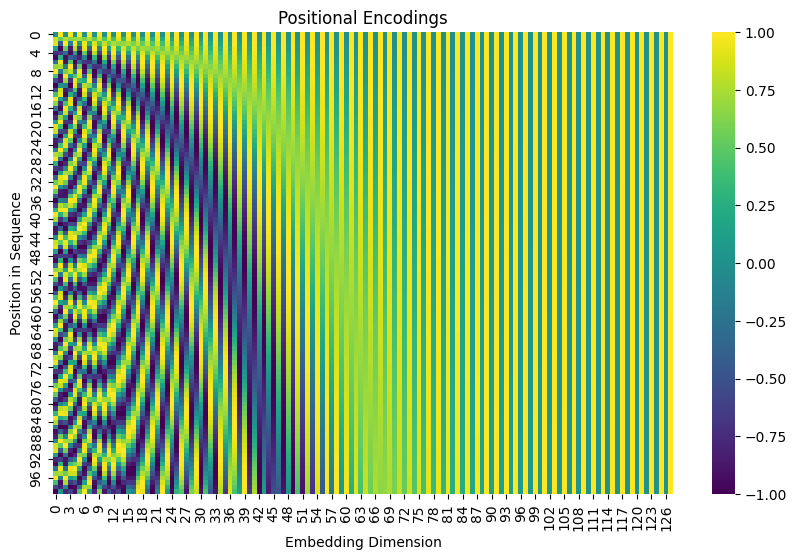

In [ ]:
pos_encodings = pos_encoding(100, 128)

plt.figure(figsize=(10, 6))
sns.heatmap(pos_encodings[0], cmap='viridis')
plt.xlabel('Embedding Dimension')
plt.ylabel('Position in Sequence')
plt.title('Positional Encodings')
plt.show()

In [ ]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

In [ ]:
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

In [ ]:
def create_masks(inputs, targets):
    enc_padding_mask = create_padding_mask(inputs)
    dec_padding_mask = create_padding_mask(inputs)
    look_ahead_mask = create_look_ahead_mask(tf.shape(targets)[1])
    dec_target_padding_mask = create_padding_mask(targets)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
    return enc_padding_mask, combined_mask, dec_padding_mask

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)
    dk = tf.cast(tf.shape(k)[-1], dtype=tf.float32)
    scaled_dk = tf.math.sqrt(dk)
    scaled_attention_logits = matmul_qk / scaled_dk
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    output = tf.matmul(attention_weights, v)
    return output, attention_weights

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, key_dim, num_heads, dropout_rate=0.0):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim
        assert key_dim % num_heads == 0
        self.depth = self.key_dim // self.num_heads
        self.wq = Dense(key_dim)
        self.wk = Dense(key_dim)
        self.wv = Dense(key_dim)
        self.dropout = Dropout(dropout_rate)
        self.dense = Dense(key_dim)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask=None):
        batch_size = tf.shape(q)[0]
        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.key_dim))
        output = self.dense(concat_attention)
        output = self.dropout(output)
        return output, attention_weights

In [ ]:
def FeedForward(embedding_dim, fully_connected_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(fully_connected_dim, activation='relu'),
        tf.keras.layers.Dense(embedding_dim)
    ])
    return model

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, fully_connected_dim, dropout_rate=0.1):
        super(EncoderLayer, self).__init__()
        self.mha = MultiHeadAttention(embedding_dim, num_heads, dropout_rate)
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout = Dropout(dropout_rate)
        self.ffn = FeedForward(embedding_dim, fully_connected_dim)

    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)
        out1 = self.layernorm1(attn_output + x)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout(ffn_output, training=training)
        out2 = self.layernorm2(ffn_output + out1)
        return out2

In [ ]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size_, maximum_position_encoding, dropout_rate=0.1):
        super(Encoder, self).__init__()
        self.num_layers = num_layers
        self.embedding_dim = embedding_dim
        self.embedding = Embedding(input_vocab_size_, embedding_dim)
        self.pos_encoding = pos_encoding(maximum_position_encoding, embedding_dim)
        self.enc_layers = [EncoderLayer(embedding_dim, num_heads, fully_connected_dim, dropout_rate) for _ in range(num_layers)]
        self.dropout = Dropout(dropout_rate)

    def call(self, inputs, training, mask):
        seq_len = tf.shape(inputs)[1]
        inputs = self.embedding(inputs)
        inputs *= tf.math.sqrt(tf.cast(self.embedding_dim, tf.float32))
        inputs += self.pos_encoding[:, :seq_len, :]
        inputs = self.dropout(inputs, training=training)
        for i in range(self.num_layers):
            inputs = self.enc_layers[i](inputs, training, mask)
        return inputs

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, fully_connected_dim, dropout_rate=0.1):
        super(DecoderLayer, self).__init__()
        self.mha1 = MultiHeadAttention(embedding_dim, num_heads, dropout_rate)
        self.mha2 = MultiHeadAttention(embedding_dim, num_heads, dropout_rate)
        self.ffn = FeedForward(embedding_dim, fully_connected_dim)
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.layernorm3 = LayerNormalization(epsilon=1e-6)
        self.dropout3 = Dropout(dropout_rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        out1 = self.layernorm1(attn1 + x)
        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        out2 = self.layernorm2(attn2 + out1)
        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)
        return out3, attn_weights_block1, attn_weights_block2

In [ ]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, embedding_dim, num_heads, fully_connected_dim, target_vocab_size, maximum_position_encoding, dropout_rate=0.1):
        super(Decoder, self).__init__()
        self.num_layers = num_layers
        self.embedding_dim = embedding_dim
        self.embedding = Embedding(target_vocab_size, embedding_dim)
        self.pos_encoding = pos_encoding(maximum_position_encoding, embedding_dim)
        self.dec_layers = [DecoderLayer(embedding_dim, num_heads, fully_connected_dim, dropout_rate=0.1) for _ in range(num_layers)]
        self.dropout = Dropout(dropout_rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.embedding_dim, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]
        x = self.dropout(x, training=training)
        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask)
            attention_weights[f"decoder_layer{i + 1}_block1"] = block1
            attention_weights[f"decoder_layer{i + 1}_block2"] = block2
        return x, attention_weights

In [ ]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size_, target_vocab_size, max_positional_encoding_input, max_positional_encoding_target, dropout_rate=0.1):
        super(Transformer, self).__init__()
        self.encoder = Encoder(num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size_, max_positional_encoding_input, dropout_rate)
        self.decoder = Decoder(num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size_, max_positional_encoding_target, dropout_rate)
        self.final_layer = tf.keras.layers.Dense(target_vocab_size, activation='softmax')

    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        enc_output = self.encoder(inp, training, enc_padding_mask)
        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)
        final_output = self.final_layer(dec_output)
        return final_output, attention_weights

In [ ]:
embedding_dim_ = 256
fully_connected_dim_ = 512
num_layers_ = 4
num_heads_ = 8
dropout_rate_ = 0.1
input_vocab_size_ = len(tokenizer_fr.word_index) + 2
target_vocab_size_ = len(tokenizer_eng.word_index) + 2
max_positional_encoding_input_ = input_vocab_size_
max_positional_encoding_target_ = target_vocab_size_
EPOCHS = 50
batch_size = 256

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, embedding_dim, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.embedding_dim = tf.cast(embedding_dim, dtype=tf.float32)
        self.warmup_steps = tf.cast(warmup_steps, dtype=tf.float32)

    def __call__(self, step):
        step = tf.cast(step, dtype=tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.embedding_dim) * tf.math.minimum(arg1, arg2)


In [ ]:
learning_rate_ = CustomSchedule(embedding_dim_)

transformer_ = Transformer(num_layers_, embedding_dim_, num_heads_,
                           fully_connected_dim_, input_vocab_size_, target_vocab_size_,
                           max_positional_encoding_input_, max_positional_encoding_target_, dropout_rate_)

optimizer_ = tf.keras.optimizers.Adam(learning_rate_, beta_1=0.9, beta_2 = 0.98, epsilon = 1e-9)

loss_object_ = tf.keras.losses.SparseCategoricalCrossentropy()

In [ ]:
def loss_function_(true_values, predictions):
    mask = tf.math.logical_not(tf.math.equal(true_values, 0))
    loss = loss_object_(true_values, predictions)
    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask
    return tf.reduce_sum(loss) / tf.reduce_sum(mask)

In [ ]:
def accuracy_function_(true_values, predictions):
    accuracies = tf.equal(true_values, tf.argmax(predictions, axis=2))
    mask = tf.math.logical_not(tf.math.equal(true_values, 0))
    accuracies = tf.math.logical_and(mask, accuracies)
    accuracies = tf.cast(accuracies, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)
    return tf.reduce_sum(accuracies) / tf.reduce_sum(mask)

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

In [ ]:
train_step_signature = [
    tf.TensorSpec(shape=(batch_size, 30), dtype=tf.int64),
    tf.TensorSpec(shape=(batch_size,30), dtype=tf.int64),
]

In [ ]:
@tf.function(input_signature=train_step_signature)
def train_step_(encoder_input_, target_):
    decoder_input_ = target_[:, :-1]
    expected_output_ = target_[:, 1:]
    enc_padding_mask_, combined_mask_, dec_padding_mask_ = create_masks(encoder_input_, decoder_input_)
    with tf.GradientTape() as tape:
        predictions_, _ = transformer_(encoder_input_, decoder_input_, True, enc_padding_mask_, combined_mask_, dec_padding_mask_)
        loss = loss_function_(expected_output_, predictions_)
    gradients_ = tape.gradient(loss, transformer_.trainable_variables)
    optimizer_.apply_gradients(zip(gradients_, transformer_.trainable_variables))
    train_loss(loss)
    train_accuracy(expected_output_, predictions_)

In [ ]:
epoch_losses = []
epoch_accuracies = []
for epoch in range(1, EPOCHS+1):
    train_loss.reset_states()
    train_accuracy.reset_states()
    current_batch_index_ = 0
    for i in range(int(len(eng_sen)/batch_size)):
        target_batch_ = tf.convert_to_tensor(np.array(eng_sen[current_batch_index_:current_batch_index_+batch_size]),dtype=tf.int64)
        input_batch_ = tf.convert_to_tensor(np.array(bang_sen[current_batch_index_:current_batch_index_+batch_size]),dtype=tf.int64)
        current_batch_index_ = current_batch_index_ + batch_size
        train_step_(input_batch_, target_batch_)
    epoch_losses.append(train_loss.result().numpy())
    epoch_accuracies.append(train_accuracy.result().numpy())
    print (f'Epoch {epoch} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

Epoch 1 Loss 8.7903 Accuracy 0.0353
Epoch 2 Loss 7.6676 Accuracy 0.7226
Epoch 3 Loss 6.7510 Accuracy 0.7312
Epoch 4 Loss 6.1790 Accuracy 0.7312
Epoch 5 Loss 5.7532 Accuracy 0.7312
Epoch 6 Loss 5.3282 Accuracy 0.7312
Epoch 7 Loss 4.8567 Accuracy 0.7312
Epoch 8 Loss 4.3368 Accuracy 0.7312
Epoch 9 Loss 3.7907 Accuracy 0.7312
Epoch 10 Loss 3.2673 Accuracy 0.7312
Epoch 11 Loss 2.8441 Accuracy 0.7312
Epoch 12 Loss 2.5361 Accuracy 0.7312
Epoch 13 Loss 2.2322 Accuracy 0.7313
Epoch 14 Loss 2.0655 Accuracy 0.7495
Epoch 15 Loss 1.9653 Accuracy 0.7612
Epoch 16 Loss 1.8900 Accuracy 0.7645
Epoch 17 Loss 1.8411 Accuracy 0.7653
Epoch 18 Loss 1.8039 Accuracy 0.7655
Epoch 19 Loss 1.7815 Accuracy 0.7661
Epoch 20 Loss 1.7625 Accuracy 0.7676
Epoch 21 Loss 1.7359 Accuracy 0.7680
Epoch 22 Loss 1.7155 Accuracy 0.7690
Epoch 23 Loss 1.7046 Accuracy 0.7701
Epoch 24 Loss 1.6954 Accuracy 0.7713
Epoch 25 Loss 1.6911 Accuracy 0.7712
Epoch 26 Loss 1.6617 Accuracy 0.7730
Epoch 27 Loss 1.6345 Accuracy 0.7759
Epoch 28 L

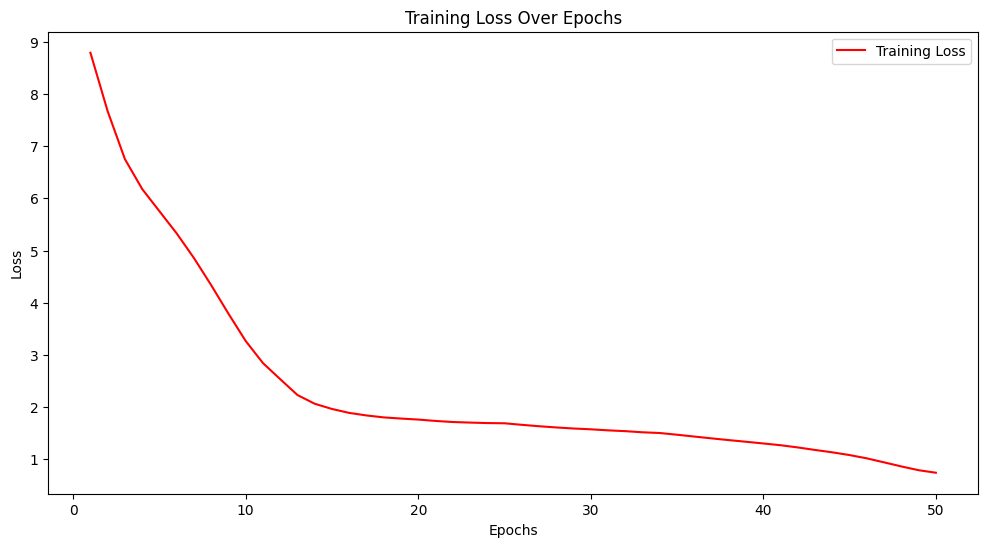

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, EPOCHS+1), epoch_losses, label='Training Loss', color='red')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

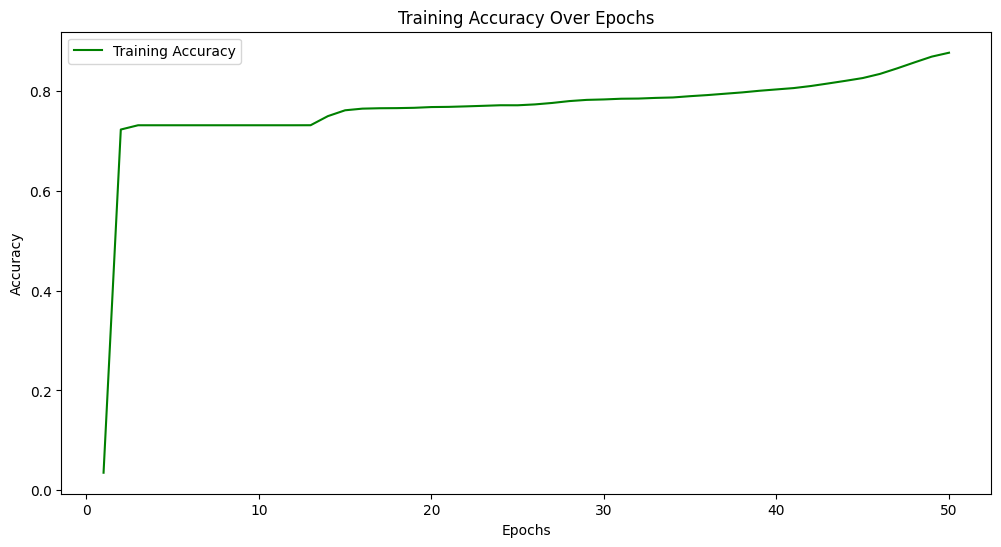

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, EPOCHS+1), epoch_accuracies, label='Training Accuracy', color='green')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
maxlen_ = 30
def translate_helper_(sentence):
    sentence = 'sos ' + sentence[0] + ' eos.'
    sentence = [sentence]
    sentence = tokenizer_fr.texts_to_sequences(sentence)
    sentence = pad_sequences(sentence, maxlen=30, padding='post', truncating='post')
    input_ = tf.convert_to_tensor(np.array(sentence),dtype=tf.int64)
    decoder_input_ = tokenizer_eng.texts_to_sequences(['sos'])
    decoder_input_ = tf.convert_to_tensor(np.array(decoder_input_), dtype=tf.int64)
    for i in range(maxlen_):
        enc_padding_mask_, combined_mask_, dec_padding_mask_ = create_masks(input_, decoder_input_)
        predictions_, _ = transformer_(input_, decoder_input_,False,enc_padding_mask_,combined_mask_, dec_padding_mask_)
        predictions_ = predictions_[: ,-1:, :]
        predicted_id_ = tf.cast(tf.argmax(predictions_, axis=-1), tf.int64)
        if predicted_id_ == tokenizer_eng.texts_to_sequences(['eos']):
            return tf.squeeze(decoder_input_, axis=0)
        decoder_input_ = tf.concat([decoder_input_, predicted_id_], axis=1)
    return tf.squeeze(decoder_input_, axis=0)

In [ ]:
def transliterate(sentence):
    sentence = [sentence]
    print(f'Input sentence: {sentence[0]}')
    print()
    result_ = (translate_helper_(sentence)).tolist()
    predicted_ids_ = [i for i in result_ if i != tokenizer_eng.texts_to_sequences(['sos'])[0][0]
                     and i != tokenizer_eng.texts_to_sequences(['eos.'])[0][0]]
    predicted_sentence = tokenizer_eng.sequences_to_texts([predicted_ids_])
    print(f'Translation: {predicted_sentence[0]}')

In [ ]:
sentence = "akashe chand utheche"
transliterate(sentence)

Input sentence: akashe chand utheche

Translation: অ্যাক্সেস চলবে


In [ ]:
# # Function to calculate accuracy
# def calculate_accuracy(dataset):
#     total_samples = len(dataset)
#     correct_predictions = 0

#     for index, row in dataset.iterrows():
#         banglish_sentence = row[0]
#         bangla_sentence = row[1]

#         translated_sentence = translate_helper_([banglish_sentence]).numpy().tolist()
#         translated_sentence = [i for i in translated_sentence if i != tokenizer_eng.texts_to_sequences(['sos'])[0][0]
#                                and i != tokenizer_eng.texts_to_sequences(['eos.'])[0][0]]
#         translated_sentence = tokenizer_eng.sequences_to_texts([translated_sentence])[0]

#         if translated_sentence == bangla_sentence:
#             correct_predictions += 1

#     accuracy = (correct_predictions / total_samples) * 100
#     return accuracy

# # Calculate accuracy for the dataset
# accuracy = calculate_accuracy(data_frame)
# print(f"Accuracy for the dataset: {accuracy:.2f}%")
